# Data Analysis Examples

## Bitly Data from 1.USA.gov

In [1]:
location = r'C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\example.txt'

with open(location, 'r') as file:
    print(file.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [2]:
import json

with open(location) as file:
    records = [json.loads(line) for line in file]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python

In [4]:
timezones = [record['tz'] for record in records if 'tz' in record]

In [5]:
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

### Counting Timezones

In [6]:
import pandas as pd
pd.Series(timezones).value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Length: 97, dtype: int64

In [7]:
frame = pd.DataFrame(records)
frame.head()

a   c   nk  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  1.0   
1                             GoogleMaps/RochesterNY  US  0.0   
2  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  1.0   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...  BR  0.0   
4  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  0.0   

                  tz  gr       g       h         l              al         hh  \
0   America/New_York  MA  A6qOVH  wfLQtf   orofrog  en-US,en;q=0.8  1.usa.gov   
1     America/Denver  UT  mwszkS  mwszkS     bitly             NaN       j.mp   
2   America/New_York  DC  xxr3Qb  xxr3Qb     bitly           en-US  1.usa.gov   
3  America/Sao_Paulo  27  zCaLwp  zUtuOu  alelex88           pt-br  1.usa.gov   
4   America/New_York  MA  9b6kNl  9b6kNl     bitly  en-US,en;q=0.8     bit.ly   

                                                   r  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...   
1                           http://www.AwareMap.com/   
2                               http://t.co/03elZC4Q   
3                                             direct   
4                http://www.shrewsbury-ma.gov/selco/   

                                                   u             t  \
0        http://www.ncbi.nlm.nih.gov/pubmed/22415991  1.331923e+09   
1        http://www.monroecounty.gov/etc/911/rss.php  1.331923e+09   
2  http://boxer.senate.gov/en/press/releases/0316...  1.331923e+09   
3            http://apod.nasa.gov/apod/ap120312.html  1.331923e+09   
4  http://www.shrewsbury-ma.gov/egov/gallery/1341...  1.331923e+09   

             hc          cy                        ll  _heartbeat_   kw  
0  1.331823e+09     Danvers   [42.576698, -70.954903]          NaN  NaN  
1  1.308262e+09       Provo  [40.218102, -111.613297]          NaN  NaN  
2  1.331920e+09  Washington     [38.9007, -77.043098]          NaN  NaN  
3  1.331923e+09        Braz  [-23.549999, -46.616699]          NaN  NaN  
4  1.273672e+09  Shrewsbury   [42.286499, -71.714699]          NaN  NaN

In [8]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

<Axes: >

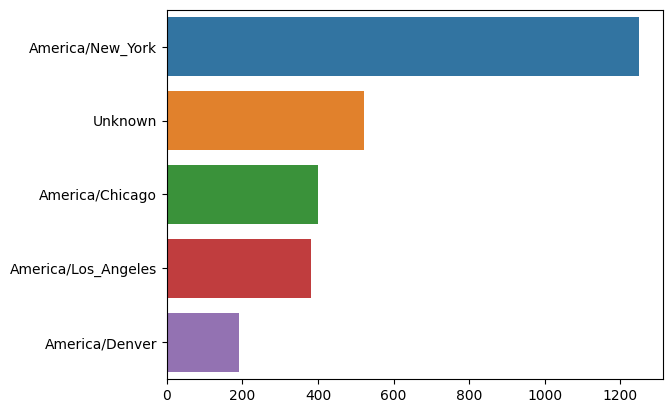

In [9]:
import seaborn as sns

sns.barplot(y=tz_counts[:5].index, x=tz_counts[:5].to_numpy())

In [10]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [11]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [12]:
results.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [13]:
import numpy as np
cframe = frame[frame['a'].notna()].copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
by_tz_os = cframe.groupby(['tz', 'os'])

agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os                   Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 0.0      3.0
Africa/Casablanca            0.0      1.0
Africa/Ceuta                 0.0      2.0
Africa/Johannesburg          0.0      1.0

In [14]:
indexer = agg_counts.sum('columns').argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [15]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [16]:
agg_counts.sum('columns').nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [17]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [18]:
count_subset = count_subset.reset_index()
count_subset.head()

tz           os  total
0  America/Sao_Paulo  Not Windows   13.0
1  America/Sao_Paulo      Windows   20.0
2      Europe/Madrid  Not Windows   16.0
3      Europe/Madrid      Windows   19.0
4   Pacific/Honolulu  Not Windows    0.0

<Axes: xlabel='total', ylabel='tz'>

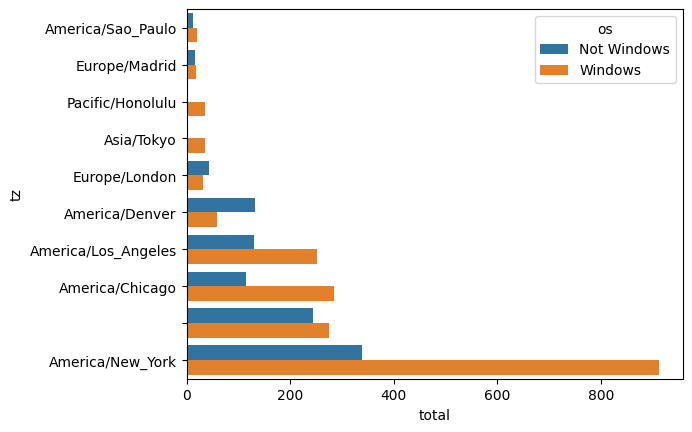

In [19]:
sns.barplot(data=count_subset, x='total', y='tz', hue='os')

C:\Users\William Costa\AppData\Local\Temp\ipykernel_11852\3751410688.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = count_subset.groupby('tz').apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

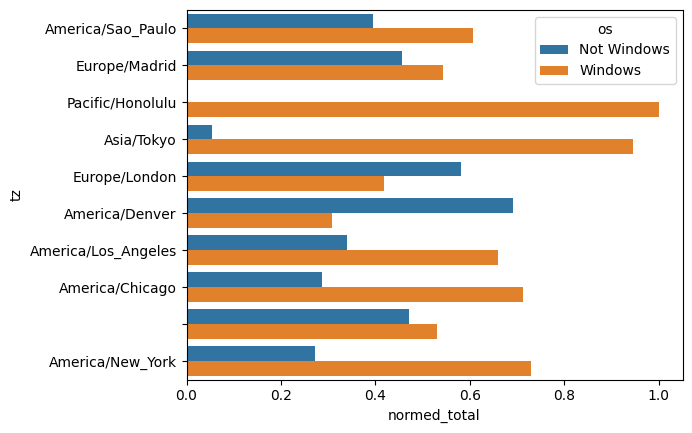

In [20]:
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [21]:
g = count_subset.groupby('tz')
results2 = count_subset['total'] / g['total'].sum()

## MovieLens 1M Dataset

In [22]:
users_location = r"C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\users.dat"
movies_location = r"C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\movies.dat"
ratings_location = r"C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\ratings.dat"
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(users_location, sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(ratings_location, sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(movies_location, sep="::",
                       header=None, names=mnames, engine="python")

In [23]:
data = pd.merge(pd.merge(ratings, users), movies)

In [24]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [25]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [26]:
top_female_ratings = mean_ratings.sort_values('F', ascending=False)
top_female_ratings.head()

gender                                               F         M
title                                                           
Clean Slate (Coup de Torchon) (1981)               5.0  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)  5.0  3.428571
Raw Deal (1948)                                    5.0  3.307692
Bittersweet Motel (2000)                           5.0       NaN
Skipped Parts (2000)                               5.0  4.000000

### Measuring Rating Disagreement

In [27]:
mean_ratings['difference'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values('difference')
sorted_by_diff.head()

gender                                                     F         M  \
title                                                                    
James Dean Story, The (1957)                        4.000000  1.000000   
Country Life (1994)                                 5.000000  2.000000   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  4.000000  1.000000   
Babyfever (1994)                                    3.666667  1.000000   
Woman of Paris, A (1923)                            5.000000  2.428571   

gender                                              difference  
title                                                           
James Dean Story, The (1957)                         -3.000000  
Country Life (1994)                                  -3.000000  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...   -3.000000  
Babyfever (1994)                                     -2.666667  
Woman of Paris, A (1923)                             -2.571429

In [28]:
sorted_by_diff[::-1].head()

gender                                       F     M  difference
title                                                           
Zero Kelvin (Kjærlighetens kjøtere) (1995) NaN  3.50         NaN
Zachariah (1971)                           NaN  3.50         NaN
Year of the Horse (1997)                   NaN  3.25         NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN  3.00         NaN
With Friends Like These... (1998)          NaN  4.00         NaN

In [29]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [30]:
movies['genre'] = movies.pop('genres').str.split('|')
movies.head()

movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                              genre  
0   [Animation, Children's, Comedy]  
1  [Adventure, Children's, Fantasy]  
2                 [Comedy, Romance]  
3                   [Comedy, Drama]  
4                          [Comedy]

In [31]:
movies_exploded = movies.explode('genre')
movies_exploded.head()

movie_id             title       genre
0         1  Toy Story (1995)   Animation
0         1  Toy Story (1995)  Children's
0         1  Toy Story (1995)      Comedy
1         2    Jumanji (1995)   Adventure
1         2    Jumanji (1995)  Children's

In [32]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [33]:
genre_ratings = (ratings_with_genre.groupby(['genre', 'age'])['rating'].mean()).unstack('age')
genre_ratings.head(10)

age                1         18        25        35        45        50  \
genre                                                                     
Action       3.506385  3.447097  3.453358  3.538107  3.528543  3.611333   
Adventure    3.449975  3.408525  3.443163  3.515291  3.528963  3.628163   
Animation    3.476113  3.624014  3.701228  3.740545  3.734856  3.780020   
Children's   3.241642  3.294257  3.426873  3.518423  3.527593  3.556555   
Comedy       3.497491  3.460417  3.490385  3.561984  3.591789  3.646868   
Crime        3.710170  3.668054  3.680321  3.733736  3.750661  3.810688   
Documentary  3.730769  3.865865  3.946690  3.953747  3.966521  3.908108   
Drama        3.794735  3.721930  3.726428  3.782512  3.784356  3.878415   
Fantasy      3.317647  3.353778  3.452484  3.482301  3.532468  3.581570   
Film-Noir    4.145455  3.997368  4.058725  4.064910  4.105376  4.175401   

age                56  
genre                  
Action       3.610709  
Adventure    3.649064  
Animation    3.756233  
Children's   3.621822  
Comedy       3.650949  
Crime        3.832549  
Documentary  3.961538  
Drama        3.933465  
Fantasy      3.532700  
Film-Noir    4.125932